# Backtest a  Strategy

In [1]:
%matplotlib inline
import quantstats as qs
# extend pandas functionality with metrics, etc.
qs.extend_pandas()
from smartbots.crypto.historical_downloader import historical_downloader, save_test_data
import datetime as dt
import pandas as pd
from smartbots.engine.data_reader import read_data_to_dataframe
from smartbots.engine.portfolio_constructor import Portfolio_Constructor

C:\Users\jcarpio\Anaconda3\envs\my38\lib\site-packages\arctic\store\_pandas_ndarray_store.py:8: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
!pip freeze requirements2.txt

aiohttp==3.8.1
aiosignal==1.2.0
ansiwrap==0.8.4
anyio @ file:///D:/bld/anyio_1641898219811/work/dist
APScheduler==3.6.3
arctic @ git+https://github.com/man-group/arctic.git@451646458c5baf85815b1e4890b67b5bddba9f27
argon2-cffi @ file:///home/conda/feedstock_root/build_artifacts/argon2-cffi_1640817743617/work
argon2-cffi-bindings @ file:///D:/bld/argon2-cffi-bindings_1640855429528/work
async-generator==1.10
async-timeout==4.0.2
atomicwrites==1.4.0
attrs @ file:///home/conda/feedstock_root/build_artifacts/attrs_1640799537051/work
Babel @ file:///home/conda/feedstock_root/build_artifacts/babel_1619719576210/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
backports.functools-lru-cache @ file:///home/conda/feedstock_root/build_artifacts/backports.functools_lru_cache_1618230623929/work
backports.zoneinfo==0.2.1
base58==2.1.1
bech32==1.2.0
betterproto==2.0.0b4
bip32utils==0.3.post4
bitarray==2.6.0
bleach @ file:///home/conda/feedstock_root/build_ar

## 1) Download Historical Data from Data Provider and save into the database.
If you already have the data in a database, you can skip this step and go to the next.

Dependings of the symbols and the length of the data, the data loader will take some time to complete. Be pacience.

If there are already some data in the database, it will update only the new data.


In [4]:
# Parameters
test = False  # set False if you have the keys for the exchange and you copy it on docker/compose.env.

if test:
    provider ='test'
    save_test_data()
else:
    provider = 'kucoin'
    symbols = ["BTC-USDT","ETH-USDT"] # List of symbols to download from provider
    start_date = dt.datetime(2022,1,1) # Start date of data to download
    end_date = dt.datetime.utcnow() # End date of data to download
    interval = '1min' # Interval of data to download
    historical_downloader(symbols=symbols,start_date=start_date, end_date=dt.datetime.utcnow(),
           provider=provider,clean_symbols_database=[],interval=interval)

2022-09-08 10:25:00
2022-09-07 09:25:00
2022-09-06 08:25:00
2022-09-05 07:25:00
2022-09-04 06:25:00
2022-09-03 05:25:00
2022-09-02 04:25:00
2022-09-01 03:25:00
2022-08-31 02:25:00
2022-08-30 01:25:00
2022-08-29 00:25:00
2022-08-27 23:25:00
2022-08-26 22:25:00
2022-08-25 21:25:00
2022-08-25 16:18:00


Pandas dataframe BTC-USDT_202208 contains Objects, saving as Blob
Pandas dataframe BTC-USDT_202209 contains Objects, saving as Blob


Symbol BTC-USDT saved.
* Historical data for BTC-USDT saved
2022-09-08 10:25:00
Waiting for 10 seconds for limits of requests
2022-09-07 09:25:00
2022-09-06 08:25:00
2022-09-05 07:25:00
2022-09-04 06:25:00
2022-09-03 05:25:00
2022-09-02 04:25:00
2022-09-01 03:25:00
2022-08-31 02:25:00
2022-08-30 01:25:00
2022-08-29 00:25:00
2022-08-27 23:25:00
2022-08-26 22:25:00
Waiting for 10 seconds for limits of requests
2022-08-25 21:25:00
2022-08-25 16:18:00


Pandas dataframe ETH-USDT_202208 contains Objects, saving as Blob
Pandas dataframe ETH-USDT_202209 contains Objects, saving as Blob


Symbol ETH-USDT saved.
* Historical data for ETH-USDT saved


## 2) Read Historical Data from Database and Visualize it.


In [2]:
provider = 'kucoin'
symbols = ["BTC-USDT","ETH-USDT"] # List of symbols to download from provider
start_date = dt.datetime(2022,8,1) # Start date of data to download
end_date = dt.datetime.utcnow() # End date of data to download
df1 = read_data_to_dataframe(symbols[0], provider,start_date=start_date,end_date=end_date)
df2 = read_data_to_dataframe(symbols[-1], provider,start_date=start_date,end_date=end_date)
df = pd.concat([df1,df2],axis=0)

<AxesSubplot:xlabel='date'>

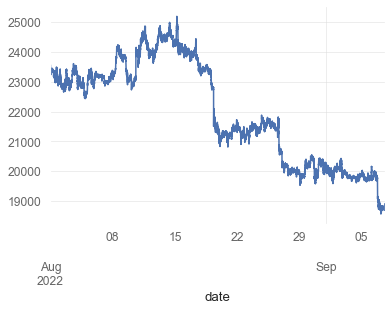

In [3]:
df1.close.plot()

## 3) BackTesting

### Settings

In [4]:
provider = 'kucoin'
inicial_cash = 50000 # initial capital for the portfolio
start_date = dt.datetime(2022,8,1) # Start date for backtesting


strategy1 = {'id': 1, # unique id for strategy to run
             'strategy': 'Simple_Avg_Cross', # strategy name, create in smartbots/crypto/strategies
             'params': {'ticker': 'BTC-USDT',
             'short_period': 10,
             'long_period': 500,
             'quantity': 1,
             'limit_save_values':1000,'point_value':1,'slippage':0}}

strategy2 = {'id': 2, # unique id for strategy to run
             'strategy': 'Simple_Avg_Cross', # strategy name, create in smartbots/crypto/strategies
             'params': {'ticker': 'ETH-USDT',
             'short_period': 10,
             'long_period': 500,
             'quantity': 1,
             'limit_save_values':1000,'point_value':1,'slippage':0}}



conf_portfolio = {'Name': 'PortfolioCrypto1',
                  'Data_Sources': 
                  [{'tickers': ['BTC-USDT','ETH-USDT'],
                   'event_type': 'bar',
                   'historical_source': 'mongoDB',
                   'historical_library': f'{provider}_historical_1min'}],
                   'Strategies': 
                    [strategy1, strategy2]}

In [5]:
portfolio = Portfolio_Constructor(conf_portfolio, run_real=False, asset_type='crypto',
                                             send_orders_to_broker=False, start_date=start_date,
                                  inicial_cash=inicial_cash)
portfolio.run_simulation() # backtest 

info_port = portfolio.get_saved_values_strategy() # read change of positions

BTC-USDT_202208
ETH-USDT_202208
BTC-USDT_202209
ETH-USDT_202209


## Statistics

Plots and statistics of the Strategies and the Portfolio.

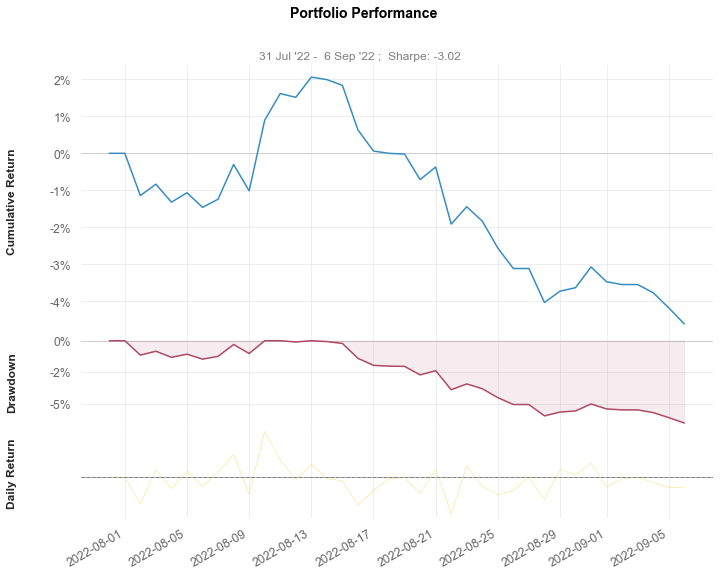

In [6]:
equities =portfolio.equity_handler.get_equities()
portfolio = equities['equity_portfolio']['equity']
port_return = portfolio.pct_change()
qs.plots.snapshot(portfolio, title='Portfolio Performance')

In [7]:
qs.reports.metrics(port_return, "BTC",mode= 'basic')

                    Strategy    Benchmark (BTC)
------------------  ----------  -----------------
Start Period        2022-08-01  2022-08-01
End Period          2022-09-06  2022-09-06
Risk-Free Rate      0.0%        0.0%
Time in Market      92.0%       68.0%

Cumulative Return   -4.61%      -2.52%
CAGR﹪              -38.04%     -22.77%

Sharpe              -3.06       -4.53
Prob. Sharpe Ratio  13.62%      2.57%
Sortino             -3.95       -4.91
Sortino/√2          -2.8        -3.47
Omega               0.59        0.59

Max Drawdown        -6.54%      -2.52%
Longest DD Days     23          35

Gain/Pain Ratio     -0.41       -0.57
Gain/Pain (1M)      -1.0        -1.0

Payoff Ratio        1.46        0.74
Profit Factor       0.59        0.43
Common Sense Ratio  0.39        0.23
CPC Index           0.31        0.11
Tail Ratio          0.66        0.54
Outlier Win Ratio   2.09        10.48
Outlier Loss Ratio  2.01        3.77

MTD                 -1.59%      -0.59%
3M                  